In this example we will try to create the cancer (http://www.bnlearn.com/bnrepository/#cancer) bayesian network using pgmpy and do some simple queries on the network.

In pgmpy, the general flow of defining a network is to first define the network and then add the parameters to it.

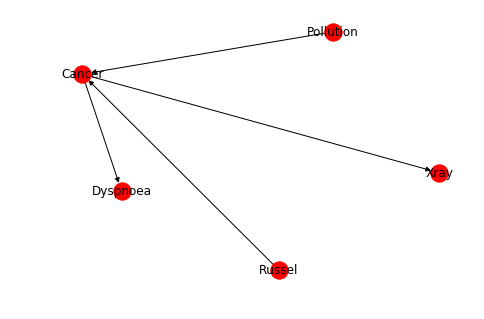

In [14]:
# Starting with defining the network structure
from pgmpy.models import BayesianModel
import networkx as nx
import pylab as plt

cancer_model = BayesianModel([('Pollution', 'Cancer'), 
                              ('Russel', 'Cancer'),
                              ('Cancer', 'Xray'),
                              ('Cancer', 'Dyspnoea')]) 

nx.draw(cancer_model, with_labels=True)
plt.show()

In [13]:
# Now defining the parameters.
from pgmpy.factors.discrete import TabularCPD

cpd_poll = TabularCPD(variable='Pollution', variable_card=2,
                      values=[[0.9], [0.1]])
cpd_smoke = TabularCPD(variable='Smoker', variable_card=2,
                       values=[[0.3], [0.7]])
cpd_cancer = TabularCPD(variable='Cancer', variable_card=2,
                        values=[[0.03, 0.05, 0.001, 0.02],
                                [0.97, 0.95, 0.999, 0.98]],
                        evidence=['Smoker', 'Pollution'],
                        evidence_card=[2, 2])
cpd_xray = TabularCPD(variable='Xray', variable_card=2,
                      values=[[0.9, 0.2], [0.1, 0.8]],
                      evidence=['Cancer'], evidence_card=[2])
cpd_dysp = TabularCPD(variable='Dyspnoea', variable_card=2,
                      values=[[0.65, 0.3], [0.35, 0.7]],
                      evidence=['Cancer'], evidence_card=[2])

In [6]:
# Associating the parameters with the model structure.
cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp)

# Checking if the cpds are valid for the model.
cancer_model.check_model()

True

In [4]:
# Doing some simple queries on the network
cancer_model.is_active_trail('Pollution', 'Smoker')

False

In [5]:
cancer_model.is_active_trail('Pollution', 'Smoker', observed=['Cancer'])

True

In [6]:
cancer_model.local_independencies('Xray')

(Xray _|_ Dyspnoea, Smoker, Pollution | Cancer)

In [7]:
cancer_model.get_independencies()

(Xray _|_ Dyspnoea, Smoker, Pollution | Cancer)
(Xray _|_ Smoker, Pollution | Dyspnoea, Cancer)
(Xray _|_ Dyspnoea, Pollution | Smoker, Cancer)
(Xray _|_ Dyspnoea, Smoker | Cancer, Pollution)
(Xray _|_ Pollution | Dyspnoea, Smoker, Cancer)
(Xray _|_ Smoker | Dyspnoea, Cancer, Pollution)
(Xray _|_ Dyspnoea | Smoker, Cancer, Pollution)
(Dyspnoea _|_ Xray, Smoker, Pollution | Cancer)
(Dyspnoea _|_ Smoker, Pollution | Xray, Cancer)
(Dyspnoea _|_ Xray, Pollution | Smoker, Cancer)
(Dyspnoea _|_ Xray, Smoker | Cancer, Pollution)
(Dyspnoea _|_ Pollution | Xray, Smoker, Cancer)
(Dyspnoea _|_ Smoker | Xray, Cancer, Pollution)
(Dyspnoea _|_ Xray | Smoker, Cancer, Pollution)
(Smoker _|_ Pollution)
(Smoker _|_ Xray, Dyspnoea | Cancer)
(Smoker _|_ Dyspnoea | Xray, Cancer)
(Smoker _|_ Xray | Dyspnoea, Cancer)
(Smoker _|_ Xray, Dyspnoea | Cancer, Pollution)
(Smoker _|_ Dyspnoea | Xray, Cancer, Pollution)
(Smoker _|_ Xray | Dyspnoea, Cancer, Pollution)
(Pollution _|_ Smoker)
(Pollution _|_ Xray, Dyspno

For an example of doing inference in Bayesian Network you can checkout: https://github.com/pgmpy/pgmpy/blob/dev/examples/Inference%20in%20Bayesian%20Networks.ipynb